# Visualize Results and Rank Single Models Used for Code Generation
1. 14 small language models (SLMs) were tested on 4 code generation datasets (`Phixtral-4x2_8` was not tested; it is added to this table for future reference only).
2. Metric used - Pass@1
3. This notebooks load raw results into a `df` dataframe and ranks the models based on their average performance across the 4 code generation datasets.
4. Alternatively, although an unnecessary step, it applies the MinMaxScaler to normalize the results and then ranks SLMs.
5. This notebook also visualizes the results by dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 1. Original Results from All Models Run on All Datasets

In [2]:
file = '/Users/andrew/Documents/04_git/code-generation/documents/2_docs/indiv_model_results_for_plotting.xlsx'
df = pd.read_excel(file)

In [3]:
# original results from all the experiments
df

,Model,Model_Size,License,HumanEval_Full,HumanEval_Complete,MBPP,LBPP,Big_Code_Bench
0,Nxcode-CQ-7B-orpo,7.25,free_100M_users,0.8293,0.75610,0.730,0.2284,0.240
1,Deepseek-Coder,6.70,free_use,0.6524,0.70730,0.010,0.0000,0.322
2,Llama 3.1 8B,8.00,free_700M_users,0.6590,0.55470,0.568,0.2160,0.298
3,CodeQwen-7B,7.00,free_100M_users,0.5000,0.54880,0.552,0.1975,0.268
4,OpenCodeInterpreter,6.70,Apache 2,0.4100,0.71950,0.054,0.0800,0.322
5,Artigenz-Coder-6.7B,6.70,free_responsible_use,0.0122,0.73170,0.002,0.0432,0.134
6,Code Gemma 7B,7.00,free_responsible_use,0.0000,0.27440,0.510,0.1914,0.024
7,Nous-Hermes-2-SOLAR-10.7B,10.70,Apache 2,0.2561,0.28650,0.304,0.0800,0.434
8,Codestral Mamba,7.30,Apache2,0.7561,0.60370,0.394,0.2654,0.230
9,Ministral 8B,8.00,Mistral_Commercial,0.7256,0.71340,0.562,0.2222,0.246


## 2. Visualizing by Dataset

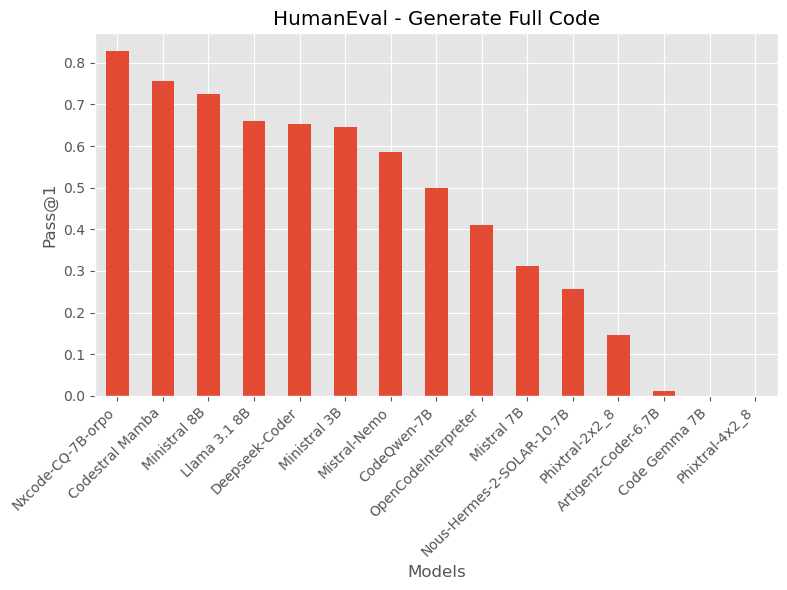

In [4]:
# single model's plot
plt.style.use('ggplot')
df.sort_values('HumanEval_Full', ascending=False).plot( x='Model', y='HumanEval_Full',
                                                        kind='bar', legend=False, figsize=(8,6))

# Add plot title and axis labels
plt.title("HumanEval - Generate Full Code")
plt.xlabel("Models")
plt.ylabel("Pass@1")

plt.xticks(rotation=45, ha='right', fontsize=10)

# Display the plot
plt.tight_layout()  # optional, makes layout a bit nicer
plt.show()

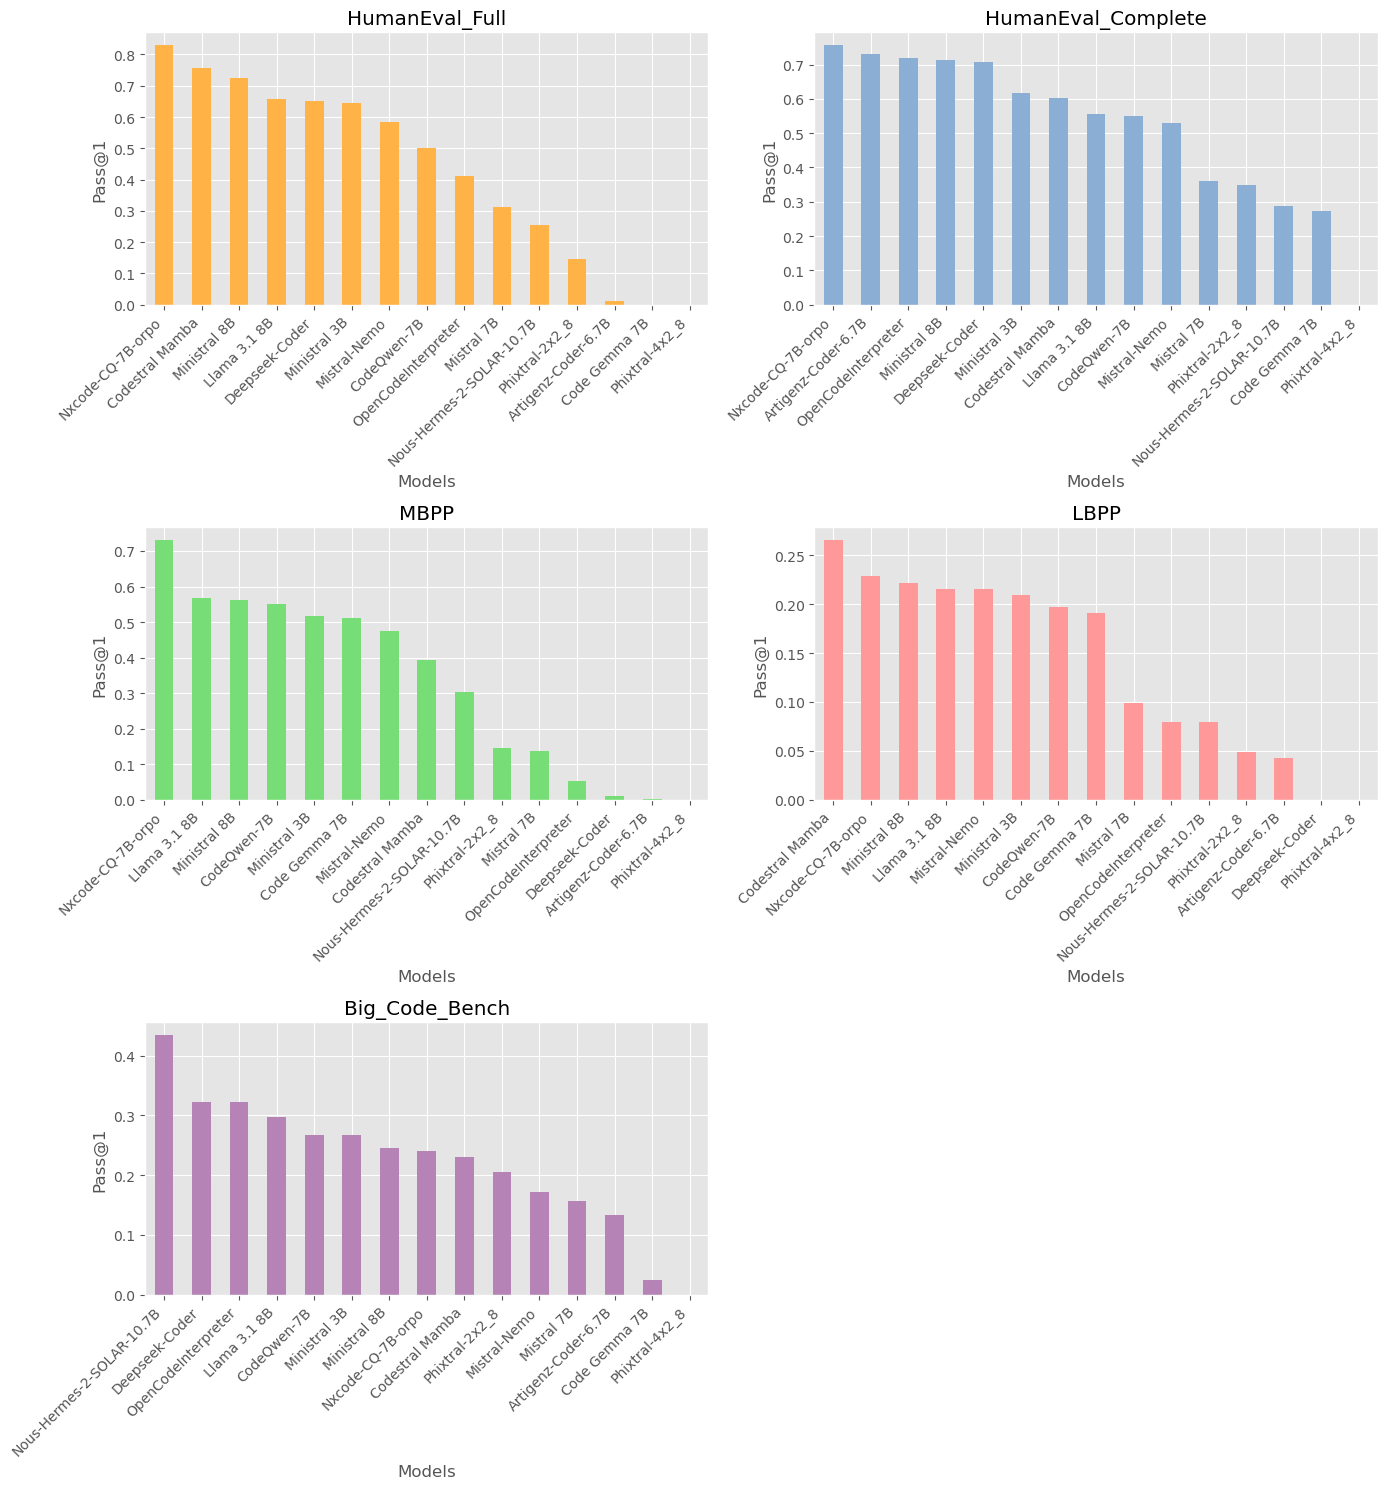

In [5]:
# all models' plots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))
cols = ['HumanEval_Full', 'HumanEval_Complete', 'MBPP', 'LBPP', 'Big_Code_Bench']

pastel_colors = [
    "#FFB347",  # Pastel orange
    "#8BAED5",  # Pastel blue
    "#77DD77",  # Pastel green
    "#FF9999",  # Pastel gray
    "#B683B6"   # Pastel purple
]

# figsize=(8,6)
for i, (ax, col) in enumerate(zip(axes.flat, cols)):
    df.sort_values(col, ascending=False).plot(
        x='Model', 
        y=col, 
        kind='bar', 
        legend=False, 
        ax=ax,
        color=pastel_colors[i]
    )
    
    ax.set_title(f"{col}")
    ax.set_xlabel("Models")
    ax.set_ylabel('Pass@1')
    ax.tick_params(axis='x', rotation=45,)  # ha='right',  fontsize=10
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('right')

# hide plot 6
if len(cols) < len(axes.flat):
    for ax in axes.flat[len(cols):]:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


# 3. Ranking models

In [14]:
from IPython.display import display, HTML

cols_text = ['Model', 'Model_Size', 'License']
df_text = df[cols_text]                              # text column(s)
df_numeric = df.drop(columns = cols_text)            # numeric columns
df_numeric['Average'] = df_numeric.mean(axis=1)
df_result = df_text.join(df_numeric)
print(df_result.shape)

# display(HTML(df_result.to_html())) - prints the same
df_result.sort_values(by='Average', ascending=False).reset_index(drop=True)

(15, 9)


,Model,Model_Size,License,HumanEval_Full,HumanEval_Complete,MBPP,LBPP,Big_Code_Bench,Average
0,Nxcode-CQ-7B-orpo,7.25,free_100M_users,0.8293,0.75610,0.730,0.2284,0.240,0.556760
1,Ministral 8B,8.00,Mistral_Commercial,0.7256,0.71340,0.562,0.2222,0.246,0.493840
2,Llama 3.1 8B,8.00,free_700M_users,0.6590,0.55470,0.568,0.2160,0.298,0.459140
3,Ministral 3B,3.00,Mistral_Commercial,0.6463,0.61590,0.518,0.2099,0.268,0.451620
4,Codestral Mamba,7.30,Apache2,0.7561,0.60370,0.394,0.2654,0.230,0.449840
5,CodeQwen-7B,7.00,free_100M_users,0.5000,0.54880,0.552,0.1975,0.268,0.413260
6,Mistral-Nemo,12.00,Apache2,0.5854,0.53050,0.474,0.2160,0.172,0.395580
7,Deepseek-Coder,6.70,free_use,0.6524,0.70730,0.010,0.0000,0.322,0.338340
8,OpenCodeInterpreter,6.70,Apache 2,0.4100,0.71950,0.054,0.0800,0.322,0.317100
9,Nous-Hermes-2-SOLAR-10.7B,10.70,Apache 2,0.2561,0.28650,0.304,0.0800,0.434,0.272120


In [18]:
from tabulate import tabulate
print(tabulate(df_result, headers='keys', tablefmt='presto'))

    | Model                     |   Model_Size | License              |   HumanEval_Full |   HumanEval_Complete |   MBPP |   LBPP |   Big_Code_Bench |   Average
----+---------------------------+--------------+----------------------+------------------+----------------------+--------+--------+------------------+-----------
  0 | Nxcode-CQ-7B-orpo         |         7.25 | free_100M_users      |           0.8293 |              0.7561  |  0.73  | 0.2284 |            0.24  |  0.55676
  1 | Deepseek-Coder            |         6.7  | free_use             |           0.6524 |              0.7073  |  0.01  | 0      |            0.322 |  0.33834
  2 | Llama 3.1 8B              |         8    | free_700M_users      |           0.659  |              0.5547  |  0.568 | 0.216  |            0.298 |  0.45914
  3 | CodeQwen-7B               |         7    | free_100M_users      |           0.5    |              0.5488  |  0.552 | 0.1975 |            0.268 |  0.41326
  4 | OpenCodeInterpreter       |    

## 4. Scaling Results and Ranking Models
Keeping this here as an option, although unnecessary one

In [10]:
# scaling results to calculate the rank of each model
from sklearn.preprocessing import MinMaxScaler

cols_text = ['Model', 'Model_Size', 'License']
df_text = df[cols_text]                              # text column(s)
df_numeric = df.drop(columns = cols_text)            # numeric columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_numeric),
    columns=df_numeric.columns,
    index=df_numeric.index
)
df_scaled['Average'] = df_scaled.mean(axis=1)
df_result = df_text.join(df_scaled)

df_result.sort_values(by='Average', ascending=False)

,Model,Model_Size,License,HumanEval_Full,HumanEval_Complete,MBPP,LBPP,Big_Code_Bench,Average
0,Nxcode-CQ-7B-orpo,7.25,free_100M_users,1.000000,1.000000,1.000000,0.860588,0.552995,0.882717
9,Ministral 8B,8.00,Mistral_Commercial,0.874955,0.943526,0.769863,0.837227,0.566820,0.798478
2,Llama 3.1 8B,8.00,free_700M_users,0.794646,0.733633,0.778082,0.813866,0.686636,0.761373
8,Codestral Mamba,7.30,Apache2,0.911733,0.798439,0.539726,1.000000,0.529954,0.755970
10,Ministral 3B,3.00,Mistral_Commercial,0.779332,0.814575,0.709589,0.790882,0.617512,0.742378
3,CodeQwen-7B,7.00,free_100M_users,0.602918,0.725830,0.756164,0.744160,0.617512,0.689317
11,Mistral-Nemo,12.00,Apache2,0.705897,0.701627,0.649315,0.813866,0.396313,0.653404
4,OpenCodeInterpreter,6.70,Apache 2,0.494393,0.951594,0.073973,0.301432,0.741935,0.512665
1,Deepseek-Coder,6.70,free_use,0.786688,0.935458,0.013699,0.000000,0.741935,0.495556
7,Nous-Hermes-2-SOLAR-10.7B,10.70,Apache 2,0.308815,0.378918,0.416438,0.301432,1.000000,0.481121


In [19]:
from typing import *
from typing import List